In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [3]:
# 1 million data
x_data = np.linspace(0.0, 10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_dataframe = pd.DataFrame(data=x_data, columns=['X_Data'])
y_dataframe = pd.DataFrame(data=y_true, columns=['Y_Data'])

In [8]:
my_data = pd.concat([x_dataframe, y_dataframe], axis=1)

In [9]:
my_data.head()

,X_Data,Y_Data
0,0.00000,4.904039
1,0.00001,5.052319
2,0.00002,5.933259
3,0.00003,3.612417
4,0.00004,4.354042


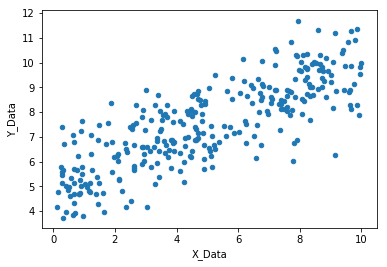

In [11]:
my_data.sample(n=300).plot(kind='scatter', x= 'X_Data', y='Y_Data')

In [12]:
batch_size = 20

In [13]:
m = tf.Variable(0.81)
b = tf.Variable(0.11)

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [15]:
y_model = m*xph + b

In [16]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])
    

In [20]:
model_m

0.4961513

In [21]:
model_b

4.9942222

In [22]:
y_hat = x_data*model_m + model_b

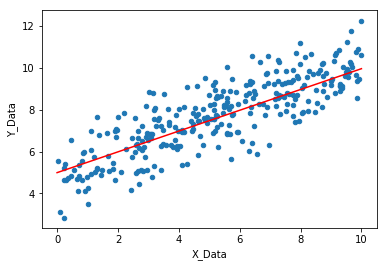

In [24]:
my_data.sample(300).plot(kind='scatter', x='X_Data', y='Y_Data')
plt.plot(x_data, y_hat, 'r')